In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

/var/folders/8c/v2m6xjg91kl8w54htt5jznhm0000gn/T/ipykernel_18169/3239929763.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv("data/book1.csv")
df = df.loc[df['weight'] > 10, :]
df

,Source,Target,Type,weight,book
8,Aemon-Targaryen-(Maester-Aemon),Jeor-Mormont,Undirected,13,1
9,Aemon-Targaryen-(Maester-Aemon),Jon-Snow,Undirected,34,1
16,Aerys-II-Targaryen,Robert-Baratheon,Undirected,12,1
17,Aggo,Daenerys-Targaryen,Undirected,11,1
30,Alliser-Thorne,Jon-Snow,Undirected,32,1
...,...,...,...,...,...
658,Sandor-Clegane,Sansa-Stark,Undirected,23,1
664,Shae,Tyrion-Lannister,Undirected,12,1
666,Shagga,Tyrion-Lannister,Undirected,17,1
676,Tyrion-Lannister,Tywin-Lannister,Undirected,40,1


In [3]:
G = nx.from_pandas_edgelist(df, source='Source', target='Target', edge_attr='weight')
print("No. of unique characters:", len(G.nodes))
print("No. of connections:", len(G.edges))

No. of unique characters: 80
No. of connections: 175


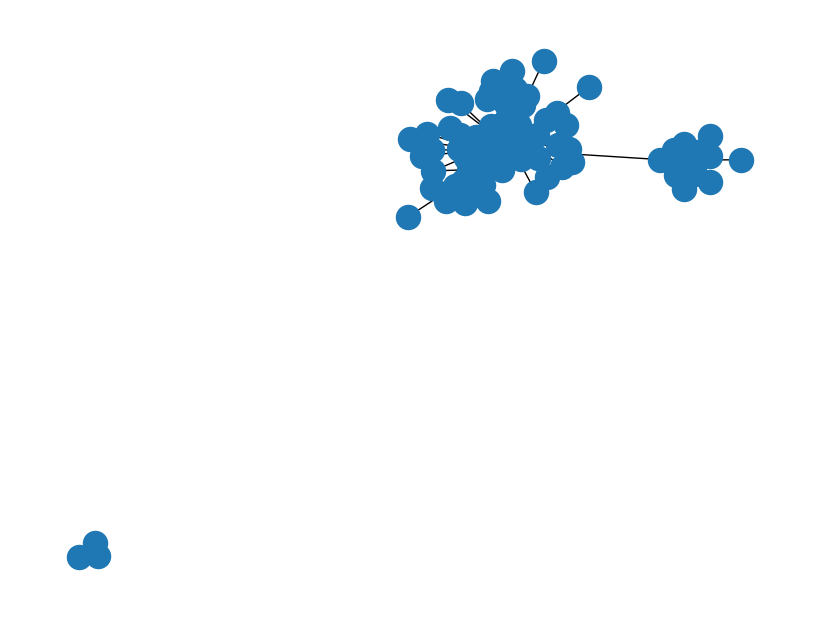

In [4]:
graphs_viz_options = [nx.draw, nx.draw_networkx, nx.draw_circular, nx.draw_kamada_kawai, nx.draw_random, nx.draw_spring]
selected_graph_option = 0

plt.figure(figsize=(8,6), dpi=100)
graphs_viz_options[selected_graph_option](G)

No. of unique characters: 4
No. of connections: 6


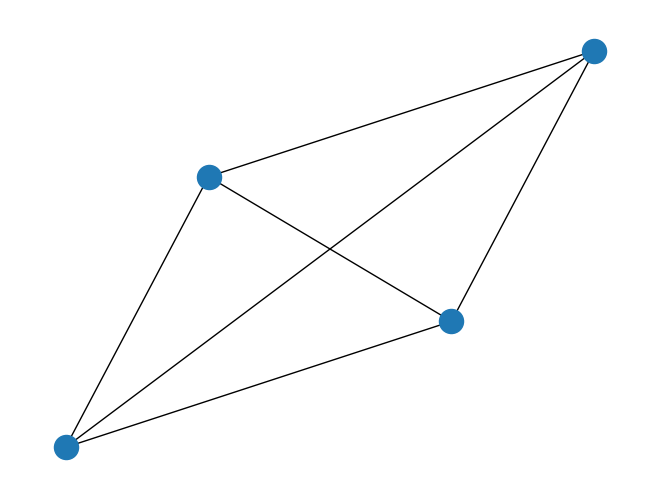

In [13]:
# Graph a dict of dicts
dod = {"Dad": {"Mom": {"weight": 1}, "Son": {"weight": 10}, "Daughter": {"weight": 10}
              },
       "Mom": {"Son": {"weight": 10}, "Daughter": {"weight": 10}},
       "Son": {"Daughter": {"weight": 20}},
    }
G = nx.from_dict_of_dicts(dod)
print("No. of unique characters:", len(G.nodes))
print("No. of connections:", len(G.edges))
nx.draw(G)

No. of unique characters: 4
No. of connections: 3


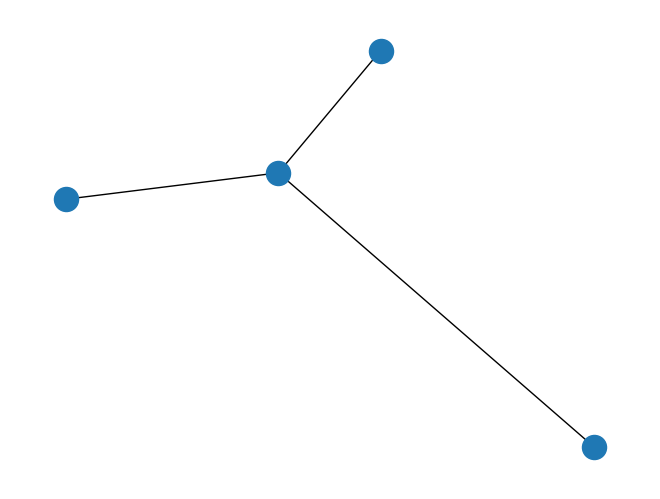

In [2]:
# Graph a dict of dicts
dod = {"Dad": {"Mom": {"weight": 1}, "Son": {"weight": 10}, "Daughter": {"weight": 10}
              },
    }
G = nx.from_dict_of_dicts(dod)
print("No. of unique characters:", len(G.nodes))
print("No. of connections:", len(G.edges))
nx.draw(G)

In [2]:
from pyvis.network import Network

In [8]:
net = Network(notebook=True)
net.add_node(1, label="Dad")
net.add_node(2, label="Mom")
net.add_node(3, label="Son")
net.add_node(4, label="Daughter")
net.get_node(2)

{'color': '#97c2fc', 'id': 2, 'label': 'Mom', 'shape': 'dot'}

In [9]:
primary_wt = 0.8
secondary_wt = 0.5
net.add_edge(1, 2, weight=primary_wt)
net.add_edge(1, 3, weight=secondary_wt)
net.add_edge(1, 4, weight=secondary_wt)

In [11]:
net.show("sample1.html")

sample1.html


In [25]:
import networkx as nx

# define weights for relationships
spouse_wt = 4
parent_wt = 3
sibling_wt = 2
step_wt = 2
uncle_wt = 2
grand_parent_wt = 1


# Graph a dict of dicts
dod = {"Dad": {"Mom": {"weight": spouse_wt}, "Son": {"weight": parent_wt}, "Daughter": {"weight": step_wt}
              },
#        "Mom": {"Son": {"weight": parent_wt}, "Daughter": {"weight": parent_wt}},
#        "Son": {"Daughter": {"weight": sibling_wt}},

    }
G = nx.from_dict_of_dicts(dod)
nt = Network(notebook=True)
nt.from_nx(G)
nt.show("sample2.html")

sample2.html
